# 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

- Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\ProUser11\Desktop\DATA ANALYSIS\Tasks\Module 5\4.1\2020 Instacart Basket Analysis'

In [3]:
df_high_activity = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [13]:
df_deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [14]:
# Checking the dataframe
df_high_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,gender,state,age,registration_date,number_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity


In [15]:
df_high_activity.shape

(30964564, 33)

In [17]:
df_deps.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
# Checking age
df_high_activity['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### Separating Customers By Age Group

- Young Adult : 18-39 
- Middle-Aged : 40-65 
- Senior : 65+

In [20]:
# Creating Groups
df_high_activity.loc[(df_high_activity['age'] >= 18) & (df_high_activity['age'] <= 39), 'age_group'] = 'Young Adult'
df_high_activity.loc[(df_high_activity['age'] >= 40) & (df_high_activity['age'] <= 65), 'age_group'] = 'Middle-Aged'
df_high_activity.loc[df_high_activity['age'] > 65, 'age_group'] = 'Senior'

In [22]:
# Checking age groups
df_high_activity['age_group'].value_counts(dropna = False)

Middle-Aged    12568620
Young Adult    10665110
Senior          7730834
Name: age_group, dtype: int64

In [85]:
#creasting crosstab
age_family_status = pd.crosstab (df_high_activity['age_group'], df_high_activity['marital_status'], dropna = False)

In [86]:
age_family_status

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle-Aged,739550,0,9395235,2433835
Senior,1905721,0,5825113,0
Young Adult,0,1481172,6523363,2660575


- most customers are married

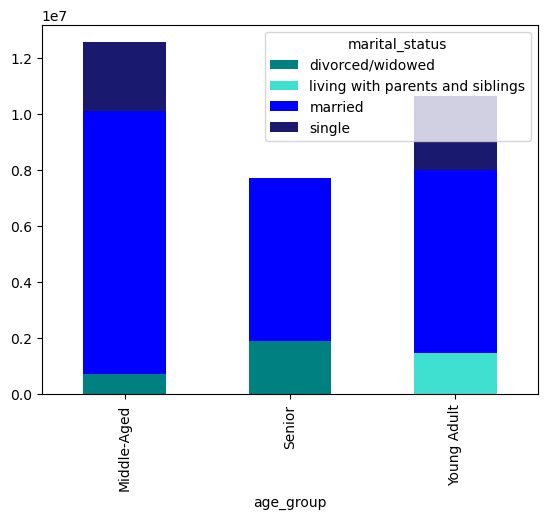

In [95]:
#creating barchart for family by age
age_family_status_bar = age_family_status.plot(kind='bar', stacked=True, color=['teal', 'turquoise', 'blue', 'midnightblue'])

Text(0.5, 1.0, 'Distribution of Age Group')

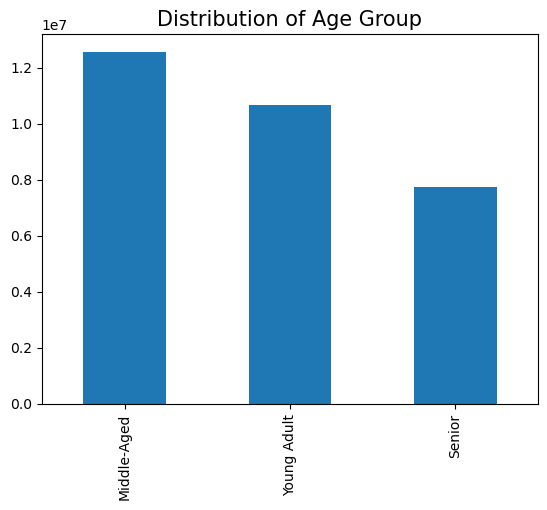

In [180]:
# 6. distribution chart
age_group_dist_bar = df_high_activity['age_group'].value_counts().plot.bar()
plt.title('Distribution of Age Group', fontsize = 15)

### Separating Customers By Income

In [98]:
df_high_activity.loc[df_high_activity['income'] < 70000, 'income_group'] = 'Low_income'
df_high_activity.loc[(df_high_activity['income'] >= 70000) & (df_high_activity['income'] <= 120000), 'income_group'] = 'Middle_income'
df_high_activity.loc[df_high_activity['income'] > 120000, 'income_group'] = 'High_income'

# Print the first 5 rows of the resulting DataFrame
print(df_high_activity.head())

   order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  age  registration_date  number_dependants marital_status  \
0         Soda  ...   31     

In [136]:
#creasting crosstab
income_status = pd.crosstab(df_high_activity['spending_flag'], df_high_activity['income_group'], dropna = False)

In [137]:
income_status

income_group,High_income,Low_income,Middle_income
spending_flag,,,
High Spender,33634,18566,45228
Low Spender,9145879,8501967,13219290


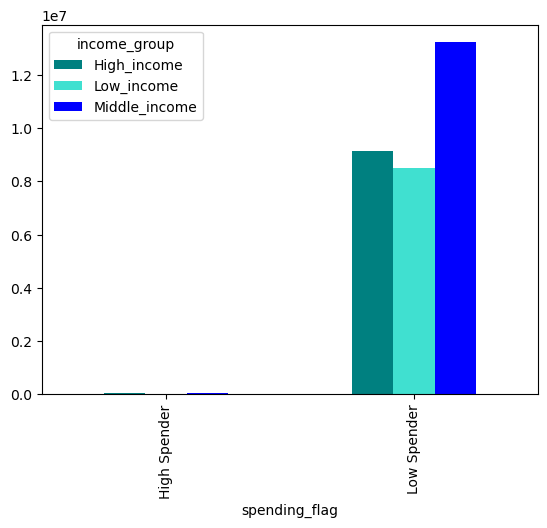

In [138]:
# creating a bar chart to see which income group spends the most
income_status_bar = income_status.plot(kind='bar', color=['teal', 'turquoise', 'blue', 'midnightblue'])

- The vast majority of customers are low spenders. A lot of them are in the middle income section.

Text(0.5, 1.0, 'Distribution of Income Groups')

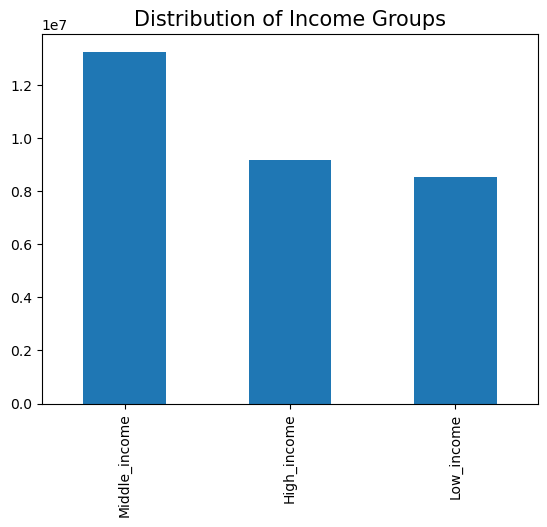

In [181]:
# 6. distribution chart
income_group_dist_bar = df_high_activity['income_group'].value_counts().plot.bar()
plt.title('Distribution of Income Groups', fontsize = 15)

### Dependents

In [28]:
df_high_activity['number_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_dependants, dtype: float64

- There is a maximum of 3 dependants in this dataset

In [34]:
# separating by family size (small, medium, large)
df_high_activity.loc[df_high_activity['number_dependants'] == 0, 'household_size'] = 'Small'
df_high_activity.loc[(df_high_activity['number_dependants'] == 1) | (df_high_activity['number_dependants'] == 2), 'household_size']  = 'Medium'
df_high_activity.loc[df_high_activity['number_dependants'] > 2, 'household_size'] = 'Large'

In [36]:
# checking my work
df_high_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,registration_date,number_dependants,marital_status,income,region,activity_flag,age_group,income_group,household_size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Young Adult,Low,Large
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Young Adult,Low,Large
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Young Adult,Low,Large
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Young Adult,Low,Large
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity,Young Adult,Low,Large


In [38]:
df_high_activity['household_size'].value_counts(dropna = False)

Medium    15452367
Large      7772516
Small      7739681
Name: household_size, dtype: int64

In [130]:
# creating a crosstab for marrital status and household size
status_house_size = pd.crosstab(df_high_activity['marital_status'], df_high_activity['household_size'], dropna = False)

In [131]:
status_house_size

household_size,Large,Medium,Small
marital_status,,,
divorced/widowed,0,0,2645271
living with parents and siblings,488469,992703,0
married,7284047,14459664,0
single,0,0,5094410


- Singles, divorcees, widowers all have small families. People living with parents and siblings or married couples have medium to large sized families

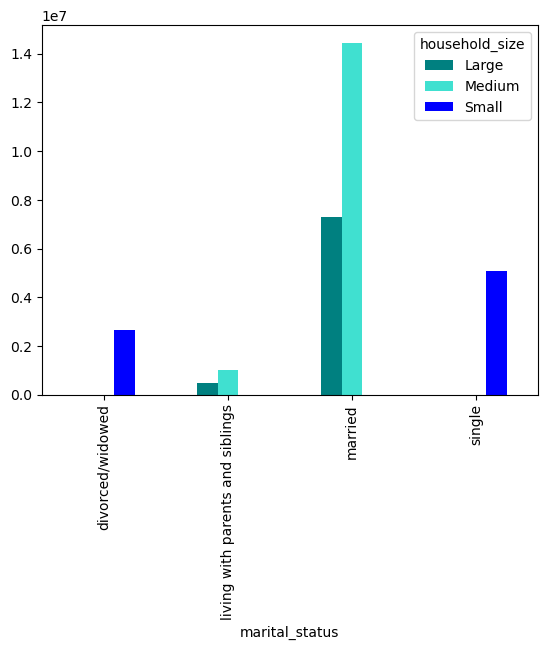

In [132]:
status_house_size_bar = status_house_size.plot(kind='bar', color=['teal', 'turquoise', 'blue', 'midnightblue'])

- The vast majortiy of clients are married in medium sized households.

Text(0.5, 1.0, 'Distribution of Household Size')

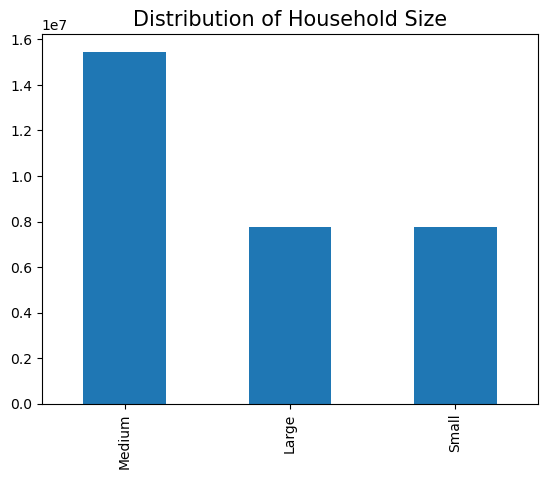

In [183]:
# 6. distribution chart
household_size_dist_bar = df_high_activity['household_size'].value_counts().plot.bar()
plt.title('Distribution of Household Size', fontsize = 15)

### Departments

In [107]:
#creating a dictionary
deps_list = dict(zip(df_deps['department_id'], df_deps['department']))

In [108]:
deps_list

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [111]:
df_high_activity['department'] = df_high_activity['department_id'].map(dept_list)

In [113]:
df_high_activity['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [128]:
# creating a crosstab for spending in departments by household size
dept_household = pd.crosstab(df_high_activity['department'], df_high_activity['household_size'], dropna = False)

Text(0.5, 1.0, 'Household Spending Per Department')

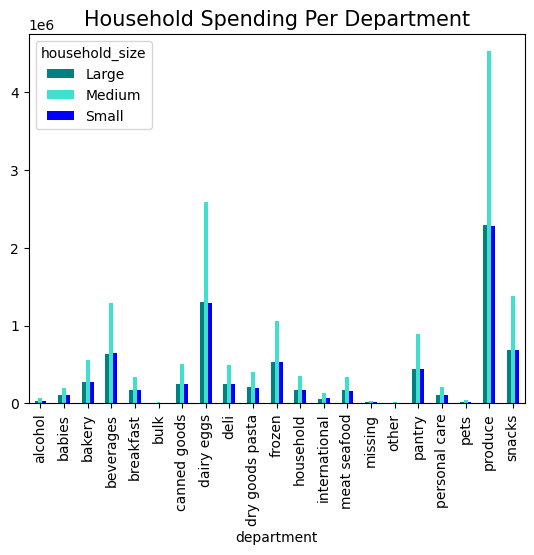

In [160]:
dept_household_bar = dept_household.plot(kind='bar', color=['teal', 'turquoise', 'blue'])
plt.title('Household Spending Per Department', fontsize = 15)

Text(0.5, 1.0, 'Distribution per Department')

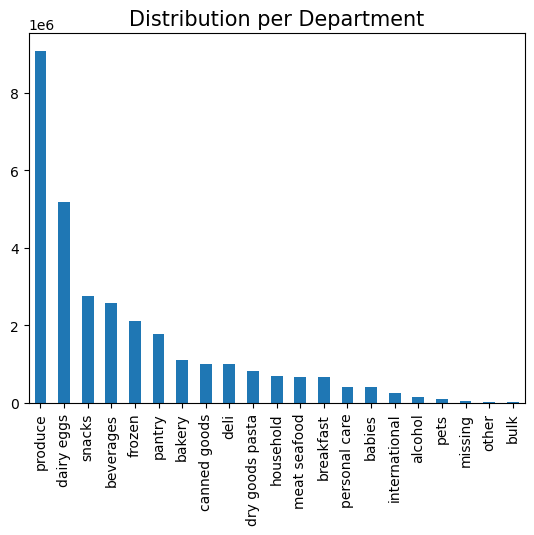

In [185]:
# 6. Distribution chart
dept_sales_dist_bar = df_high_activity['department'].value_counts().plot.bar()
plt.title('Distribution per Department', fontsize = 15)

- produce is the most popular department.

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [139]:
# I will use household_size, income_group, marital_status, age_group. I will be using 'prices' and 'add_to_cart_order'

### household_size

In [141]:
df_high_activity.groupby('household_size').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                            mean min  max
household_size                           
Large                   8.375061   1  145
Medium                  8.370250   1  114
Small                   8.336567   1  137

In [142]:
df_high_activity.groupby('household_size').agg({'prices' : ['mean', 'min', 'max']})

prices           
                    mean  min   max
household_size                     
Large           7.792076  1.0  25.0
Medium          7.789111  1.0  25.0
Small           7.788800  1.0  25.0

### income_group

In [145]:
df_high_activity.groupby('income_group').agg({'prices' : ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
High_income    7.949650  1.0  25.0
Low_income     7.358221  1.0  25.0
Middle_income  7.956353  1.0  25.0

In [146]:
df_high_activity.groupby('income_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                           mean min  max
income_group                            
High_income            8.484199   1  121
Low_income             7.965765   1  137
Middle_income          8.534382   1  145

### marital_status

In [143]:
df_high_activity.groupby('marital_status').agg({'prices' : ['mean', 'min', 'max']})

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.800090  1.0  25.0
living with parents and siblings  7.799897  1.0  25.0
married                           7.789436  1.0  25.0
single                            7.782938  1.0  25.0

In [144]:
df_high_activity.groupby('marital_status').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                                              mean min  max
marital_status                                             
divorced/widowed                          8.367467   1  137
living with parents and siblings          8.373383   1  102
married                                   8.371756   1  145
single                                    8.320522   1  109

### age_group

In [147]:
df_high_activity.groupby('age_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                         mean min  max
age_group                             
Middle-Aged          8.352173   1  145
Senior               8.308309   1   99
Young Adult          8.415515   1  109

In [148]:
df_high_activity.groupby('age_group').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Middle-Aged  7.792355  1.0  25.0
Senior       7.793521  1.0  25.0
Young Adult  7.784026  1.0  25.0

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### household_size

In [151]:
#crosstab
reg_household = pd.crosstab(df_high_activity['region'], df_high_activity['household_size'], dropna = False)

In [155]:
reg_household

household_size,Large,Medium,Small
region,,,
Midwest,1787286,3651411,1822816
Northeast,1381233,2728970,1354482
South,2585864,5143342,2581933
West,2018133,3928644,1980450


Text(0.5, 1.0, 'Distribution of Household Size per Region')

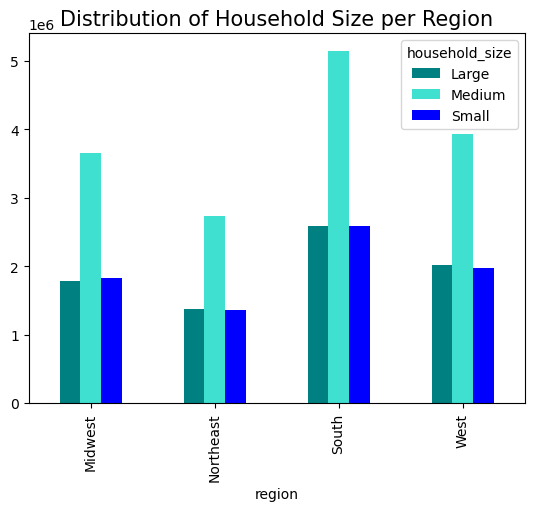

In [186]:
reg_household_bar = reg_household.plot(kind='bar', color=['teal', 'turquoise', 'blue'])
plt.title('Distribution of Household Size per Region', fontsize = 15)

In [168]:
#crosstab department
dep_household = pd.crosstab(df_high_activity['department'], df_high_activity['household_size'], dropna = False)

Text(0.5, 1.0, 'Distribution of Household Size per Department')

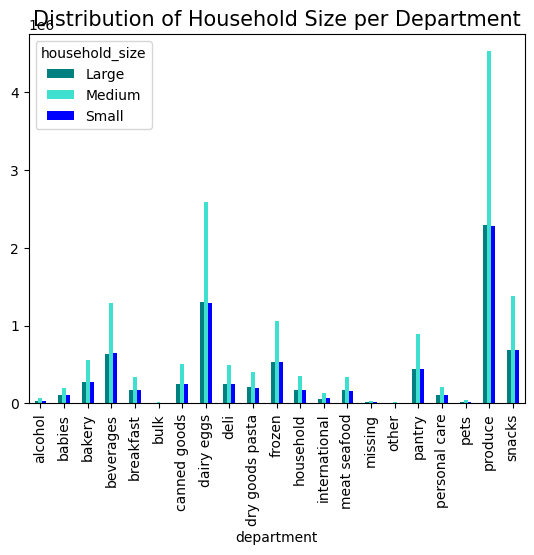

In [187]:
dep_household_bar = dep_household.plot(kind='bar', color=['teal', 'turquoise', 'blue'])
plt.title('Distribution of Household Size per Department', fontsize = 15)

### income_group

In [152]:
#crosstab
reg_income = pd.crosstab(df_high_activity['region'], df_high_activity['income_group'], dropna = False)

In [156]:
reg_income

income_group,High_income,Low_income,Middle_income
region,,,
Midwest,2188923,1974266,3098324
Northeast,1628878,1486808,2348999
South,3023406,2849538,4438195
West,2338306,2209921,3379000


Text(0.5, 1.0, 'Distribution of Income Per Region')

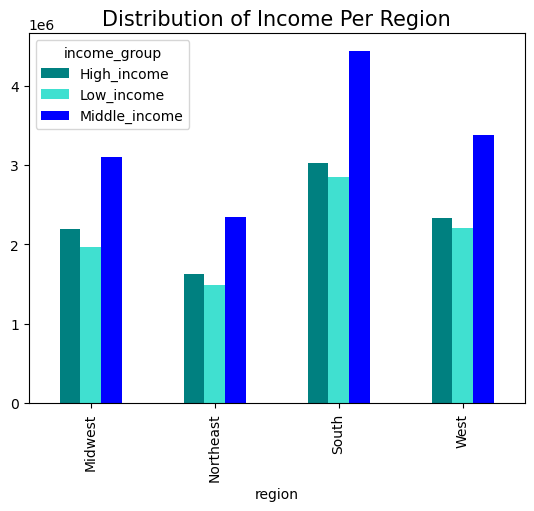

In [188]:
reg_income_bar = reg_income.plot(kind='bar', color=['teal', 'turquoise', 'blue'])
plt.title('Distribution of Income Per Region', fontsize = 15)

In [170]:
#crosstab department
dep_income = pd.crosstab(df_high_activity['department'], df_high_activity['income_group'], dropna = False)

Text(0.5, 1.0, 'Distribution of Income Per Department')

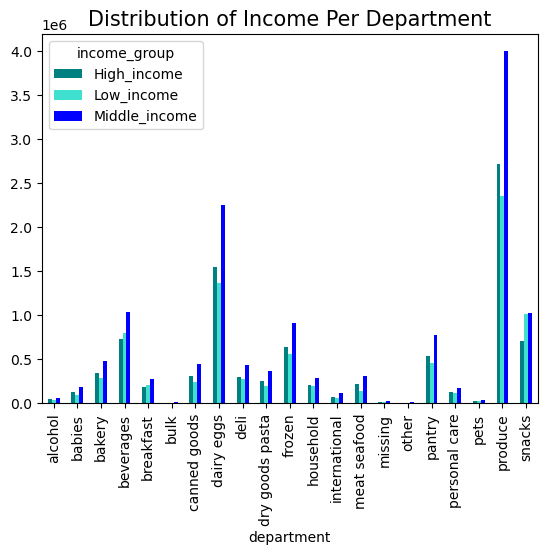

In [189]:
dep_income_bar = dep_income.plot(kind='bar', color=['teal', 'turquoise', 'blue'])
plt.title('Distribution of Income Per Department', fontsize = 15)

### marital_status

In [153]:
#crosstab
reg_marital = pd.crosstab(df_high_activity['region'], df_high_activity['marital_status'], dropna = False)

In [157]:
reg_marital

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


Text(0.5, 1.0, 'Distribution of Status Per Region')

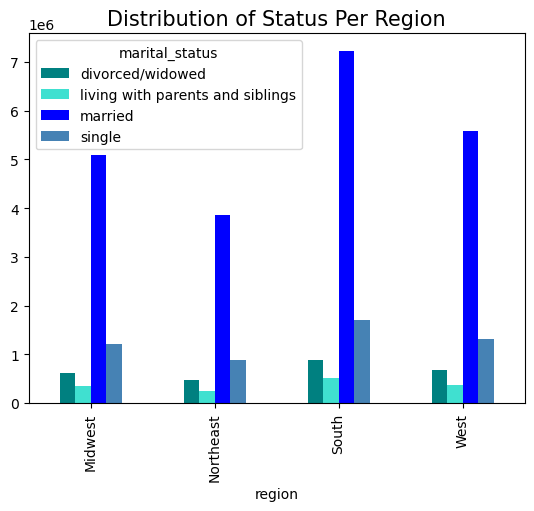

In [192]:
reg_status_bar = reg_marital.plot(kind='bar', color=['teal', 'turquoise', 'blue', 'steelblue'])
plt.title('Distribution of Status Per Region', fontsize = 15)

In [172]:
#crosstab department
dep_status = pd.crosstab(df_high_activity['department'], df_high_activity['marital_status'], dropna = False)

Text(0.5, 1.0, 'Distribution of Status Per Department')

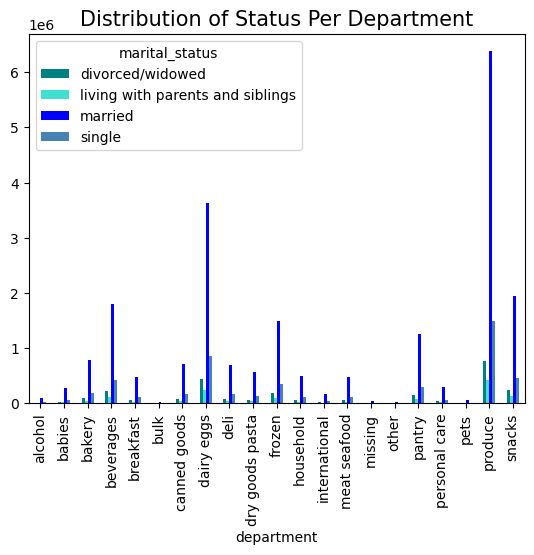

In [193]:
dep_status_bar = dep_status.plot(kind='bar', color=['teal', 'turquoise', 'blue', 'steelblue'])
plt.title('Distribution of Status Per Department', fontsize = 15)

### age_group

In [154]:
#crosstab
reg_age = pd.crosstab(df_high_activity['region'], df_high_activity['age_group'], dropna = False)

In [158]:
reg_age

age_group,Middle-Aged,Senior,Young Adult
region,,,
Midwest,2978906,1799606,2483001
Northeast,2198458,1394490,1871737
South,4153858,2549034,3608247
West,3237398,1987704,2702125


Text(0.5, 1.0, 'Distribution of Age Per Region')

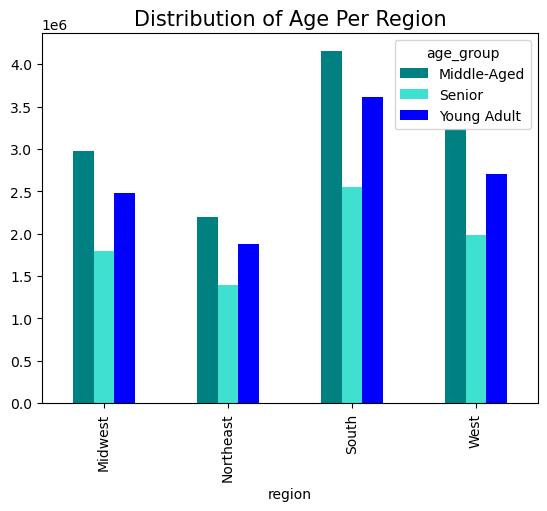

In [194]:
reg_age_bar = reg_age.plot(kind='bar', color=['teal', 'turquoise', 'blue'])
plt.title('Distribution of Age Per Region', fontsize = 15)

In [174]:
#crosstab department
dep_age = pd.crosstab(df_high_activity['department'], df_high_activity['age_group'], dropna = False)

Text(0.5, 1.0, 'Distribution of Age Per Department')

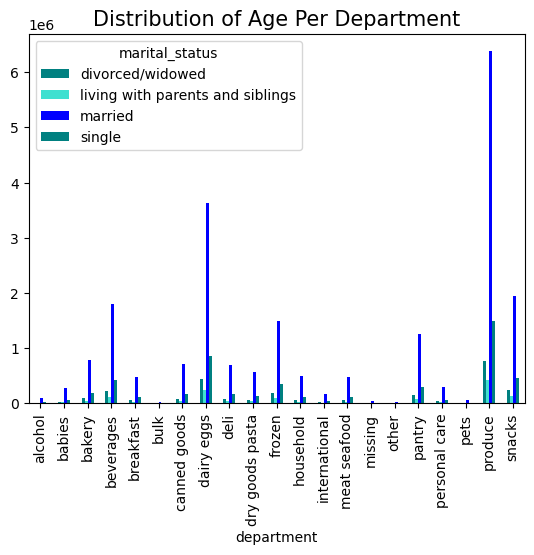

In [195]:
dep_age_bar = dep_status.plot(kind='bar', color=['teal', 'turquoise', 'blue'])
plt.title('Distribution of Age Per Department', fontsize = 15)

## Orders by region

In [199]:
#crosstab department
orders_region = pd.crosstab(df_high_activity['department'], df_high_activity['region'], dropna = False)

Text(0.5, 1.0, 'Distribution of Orders by Region')

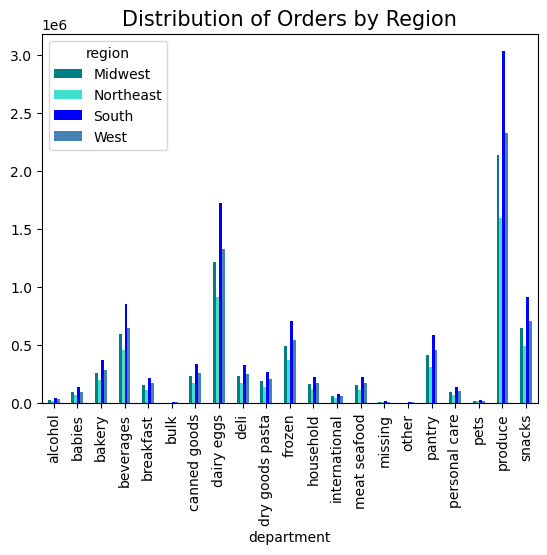

In [201]:
orders_region_bar = orders_region.plot(kind='bar', color=['teal', 'turquoise', 'blue', 'steelblue'])
plt.title('Distribution of Orders by Region', fontsize = 15)

# 9. Exporting

In [179]:
# Exporting dataframes
df_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_prod_ords_cust.pkl'))
df_deps.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_department.pkl'))

In [196]:
age_family_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_status_bar.png'))
age_group_dist_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_dist_bar.png'))
income_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_status_bar.png'))
income_group_dist_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_dist_bar.png'))
status_house_size_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'status_house_size_bar.png'))
household_size_dist_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'household_size_dist_bar.png'))
dept_sales_dist_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_sales_dist_bar.png'))
reg_household_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reg_household_bar.png'))
dep_household_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_household_bar.png'))
reg_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reg_income_bar.png'))
dep_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_income_bar.png'))
reg_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reg_status_bar.png'))
dep_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_status_bar.png'))
reg_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reg_age_bar.png'))
dep_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_age_bar.png'))